In [0]:
%tensorflow_version 2.x

In [5]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 1. 讀入 Fashion MNSIT 數據集

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


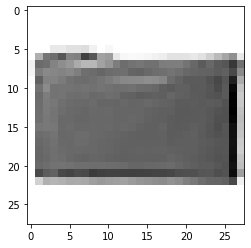

In [10]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

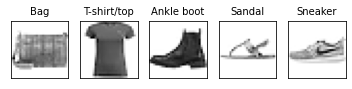

In [11]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

### 3. 建構神經網路

In [0]:
from tensorflow.keras.utils import to_categorical

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 28*28)/255
x_test = x_test.reshape(10000, 28*28)/255

In [16]:
len(set(y_train))

10

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Dense(568, input_dim = 784, activation = 'relu', kernel_initializer = 'orthogonal'))

In [0]:
model.add(Dense(568, activation = 'relu', kernel_initializer = 'orthogonal'))

In [0]:
model.add(Dense(10, activation = 'softmax', kernel_initializer = 'orthogonal'))

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
train_history = model.fit(x_train, y_train, batch_size = 200, epochs = 100, validation_split=0.2)

Epoch 1/100
240/240 [==============================] - 1s 4ms/step - loss: 0.5206 - accuracy: 0.8170 - val_loss: 0.3956 - val_accuracy: 0.8584
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3624 - accuracy: 0.8690 - val_loss: 0.3550 - val_accuracy: 0.8711
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3240 - accuracy: 0.8815 - val_loss: 0.3446 - val_accuracy: 0.8751
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2986 - accuracy: 0.8899 - val_loss: 0.3276 - val_accuracy: 0.8825
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2813 - accuracy: 0.8948 - val_loss: 0.3318 - val_accuracy: 0.8781
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2638 - accuracy: 0.9017 - val_loss: 0.3316 - val_accuracy: 0.8805
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2524 - accuracy: 0.9057 - val_loss: 0.3113 - val_accuracy: 0.8919

### 4. 訓練成果

In [0]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train], color = 'r', label = 'train_' + train)
    plt.plot(train_history.history[validation], color = 'g', label = validation)
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

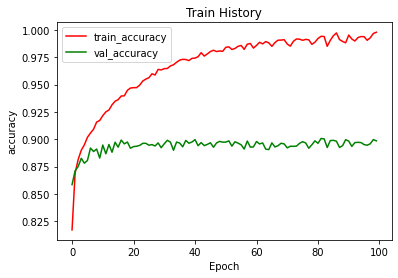

In [29]:
show_train_history(train_history, "accuracy", "val_accuracy")

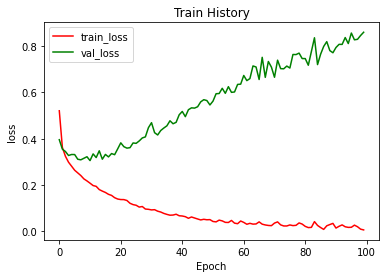

In [30]:
show_train_history(train_history, "loss", "val_loss")

In [31]:
scores = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9577 - accuracy: 0.8939


In [32]:
print("Accuracy: {}%".format(scores[1]*100))

Accuracy: 89.38999772071838%


### 5. 做的改變
1. 將初始化矩陣甚至為正交矩陣
2. loss改成cross_entropy
3. optimizer改成adam